In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [6]:
#load data
data = pd.read_excel('Welding_Data.xlsx') #using pandas to load the excel file
print(f'the data size is: {data.shape}') #check the number of samples and number of variables
print(data.head(5))
print(f'if the data has nan entry: {np.any(data.isnull() == True)}')

#data = data.dropna(axis=0, how='any') #drop nan from the data

the data size is: (480, 6)
   TrialNo  Current  Angle  Speed   Time  Height
0        1      160      0  0.005  5.003      39
1        1      160      0  0.005  5.502      39
2        1      160      0  0.005  5.969      39
3        1      160      0  0.005  6.453      38
4        1      160      0  0.005  6.920      40
if the data has nan entry: False


In [4]:
# prepare variables and target

X = data.loc[:,['Current','Angle','Speed']] #Variables, or using data.iloc[:,1:4]
Y = data.loc[:,'Height'] # Target

X = X.to_numpy() #convert data frame to numpy array
Y = Y.to_numpy()

print(X.shape, Y.shape) #if our prediciton output is (480,1), broadcasting applies, may mess with the prediciton evaluation

(480, 3) (480,)


In [5]:
# Data normalization
for i in range(X.shape[1]):
    data_ = X[:,i]
    X[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) #(data-min)/(max-min) to range[0 1]
    
const = np.ones((len(X),1)) #constant colume
X = np.concatenate((X,const),axis = 1) #group normalized input columes and constant colume together
print(X.shape)

(480, 4)


In [6]:
# split training and testing data subsets
# shuffle index, so that the training scenarios and testing scenarios are the same
# 70% training and 30% testing
index = np.arange(len(X))
np.random.shuffle(index)
breakpoint = int(np.floor(0.7*len(index))) #np.ceil
print(breakpoint)

X_Train = X[index[0:breakpoint],:]
Y_Train = Y[index[0:breakpoint]]
X_Test = X[index[breakpoint:],:]
Y_Test = Y[index[breakpoint:]]
print(X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape)

336
(336, 4) (144, 4) (336,) (144,)


In [7]:
#cost function
def cost_function(X,Y,B): #B are the coefficients in MR
    J = np.sum((X.dot(B)-Y)**2)/(2*len(X))
    return J

In [8]:
# gradient descent
def gradient_descent(X, Y, B, alpha, Iterations): #alpha: learning rate
    
    loss_history = np.zeros(Iterations)
    
    for i in range(Iterations):
        gradient = X.T.dot(X.dot(B)-Y)/len(X)
        B = B - alpha*gradient
        loss = cost_function(X,Y,B)
        loss_history[i] = loss
    
    return B, loss_history

(4,)


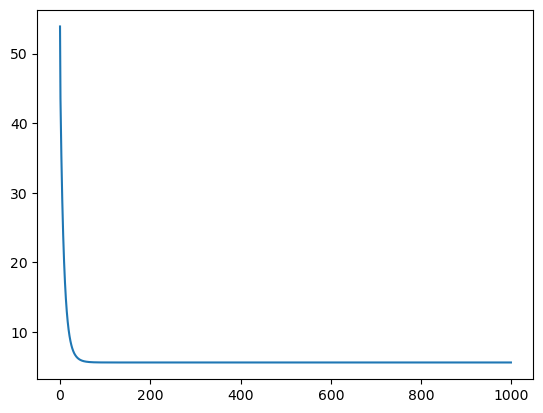

In [9]:
# training
B = np.random.random(X_Train.shape[1])
alpha = 0.5 #try 0.1,0.01
Iterations = 1000
newB, loss_history = gradient_descent(X_Train, Y_Train, B, alpha, Iterations)

plt.plot(np.arange(Iterations),loss_history)
print(newB.shape)

3.383682808055831
0.88574356327487


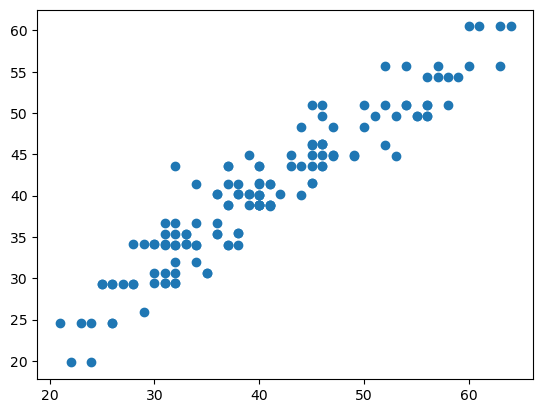

In [10]:
#testing
Y_predicted = X_Test.dot(newB)
plt.scatter(Y_Test,Y_predicted)

#performance evaluation, for regression problems, we need R2 and RMSE
def RMSE(Y,Y_pred):
    RMSE = np.sqrt(np.mean((Y-Y_pred)**2))
    return RMSE

def R2(Y,Y_pred):
    sst = np.sum((Y-Y.mean())**2)
    ssr = np.sum((Y-Y_pred)**2)
    R2 = 1-(ssr/sst)
    return R2

print(RMSE(Y_Test,Y_predicted))
print(R2(Y_Test,Y_predicted))

3.3836828080558288
0.8857435632748702


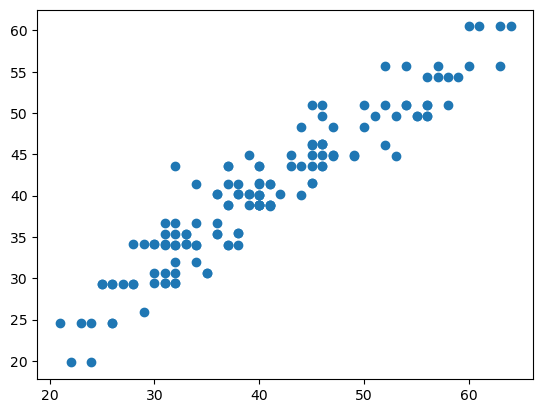

In [11]:
from sklearn import linear_model
linear = linear_model.LinearRegression() #create an object of multiple regression model
linear.fit(X_Train,Y_Train) #training process
Y_predicted_1 = linear.predict(X_Test)
plt.scatter(Y_Test,Y_predicted_1)
print(RMSE(Y_Test,Y_predicted_1))
print(R2(Y_Test,Y_predicted_1))